Contre-courant
X|z=0     =  1.0             X|z=1     = 0.602
Y|z=0 = 0.806   Y|z=1 = 0.01
A(X0-X1) 7.96e-06 S(Y1-Y0) -7.96e-06
Efficacité dans le raffinat 0.4 d'extraction 0.4


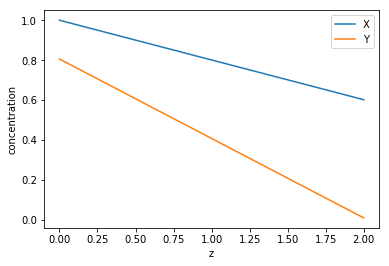

Co-courant
X|z=0     =  1.0             X|z=1     = 0.714660643197
Y|z=0 = 0.01   Y|z=1 = 0.580678713606
A(X0-X1) 5.70678713606e-06 S(Y1-Y0) 5.70678713606e-06


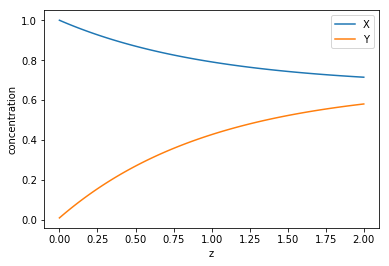

In [6]:
# Transfert in a counter-current column 
# Shooting method to solve the problem for boundary conditions at both end
from numpy import *
from scipy import integrate
from scipy import optimize
kx,ky=1.e-4, 1.e-4
K=2.
sect, a=0.001, 100.
A, S = 0.00002, 0.00001
X_0, Y_1= 1., 0.01
n=100
L=2.
z = linspace(0, L, n) 
#Set of ordinary differential equations
def dX_dz(X, z):
    kgl=1./((1./kx)+(1./(ky*K)))
    N=-kgl*(X[0]-X[1]/K)*sect*a
    return array([N/A,N/S])
Y0_try=1.
# function giving the gap between dc/dz|z=1 and the targeted boundary conditions
def cible(Y_0):
    X0 = array([X_0, Y_0])        # boundary conditions at t=0
    X, infodict = integrate.odeint(dX_dz, X0, z, full_output=True)
    return X[n-1,1]-Y_1
#find the dc/dz|z=0 to have a cible=0
Y0_found=optimize.newton(cible, Y0_try)
X0 = array([X_0, Y0_found])   
X, infodict = integrate.odeint(dX_dz, X0, z, full_output=True)
print "Contre-courant"
print "X|z=0     = ", X[0,0], "            X|z=1     =", X[n-1,0]
print "Y|z=0 =", X[0,1], "  Y|z=1 =", X[n-1,1]
print "A(X0-X1)",A*(X[0,0]-X[n-1,0]),"S(Y1-Y0)", -S*(X[0,1]-X[n-1,1])
print "Efficacité dans le raffinat", (X[0,0]-X[n-1,0])/(X[0,0]-(X[n-1,1]/K)), "d'extraction", (X[0,1]-X[n-1,1])/(K*X[0,0]-X[n-1,1])
import matplotlib.pyplot as plt
[X, Y]=plt.plot (z, X )
plt.legend([X, Y],["X","Y"], loc='best')
plt.xlabel ('z')
plt.ylabel ('concentration')
plt.show()
# Transfert in a co-current column 
# Shooting method to solve the problem for boundary conditions at both end
#Set of ordinary differential equations
def dX_dz_co(X, z):
    kgl=1./((1./kx)+(1./(ky*K)))
    N=-kgl*(X[0]-X[1])*sect*a
    return array([N/A,-N/S])
Y_0=Y_1
X0 = array([X_0, Y_0])   
X, infodict = integrate.odeint(dX_dz_co, X0, z, full_output=True)
print "Co-courant"
print "X|z=0     = ", X[0,0], "            X|z=1     =", X[n-1,0]
print "Y|z=0 =", X[0,1], "  Y|z=1 =", X[n-1,1]
print "A(X0-X1)",A*(X[0,0]-X[n-1,0]),"S(Y1-Y0)", -S*(X[0,1]-X[n-1,1])
import matplotlib.pyplot as plt
[X, Y]=plt.plot (z, X )
plt.legend([X, Y],["X","Y"], loc='best')
plt.xlabel ('z')
plt.ylabel ('concentration')
plt.show()

